<a href="https://colab.research.google.com/github/DaiVo20/Stock-Price-Prediction/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
df = pd.read_csv('/content/stock_data.csv',
					index_col ='Date')

# Print the first five rows of the dataset
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Open,High,Low,Close,Volume,OpenInt,Stock
Date,,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")

In [ ]:
companies = df['Stock'].unique()
stock ={}
for i in companies:
  stock[i] = df[df['Stock'] == i]['Close']

In [ ]:
#Checking For Stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [ ]:
!pip install pmdarima
from pmdarima.arima.utils import ndiffs
def get_d_term(data):
  return ndiffs(data.values, test='adf')  

In [ ]:
get_d_term(stock['AAPL'])

1

In [ ]:
get_d_term(stock['FB'])

1

In [ ]:
get_d_term(stock['MSFT'])

1

In [ ]:
get_d_term(stock['TSLA'])

1

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':120})

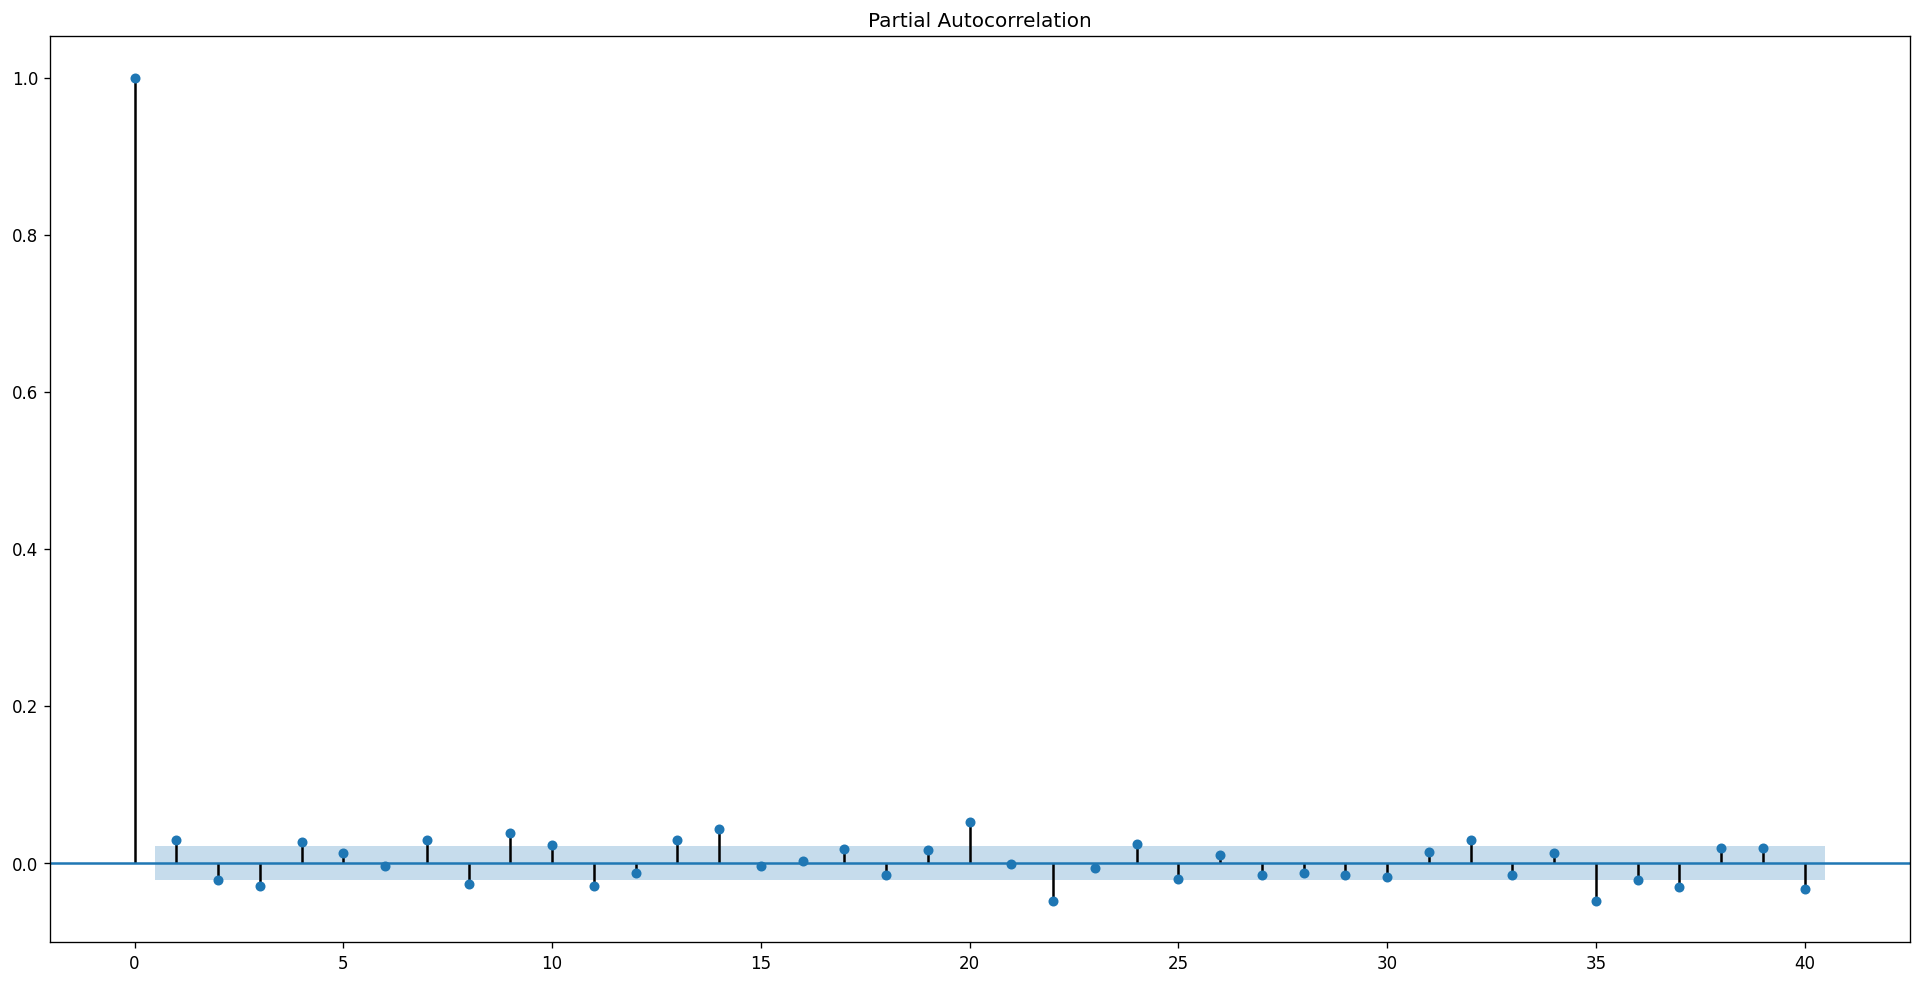

In [ ]:
plot_pacf(stock['AAPL'].diff().dropna());

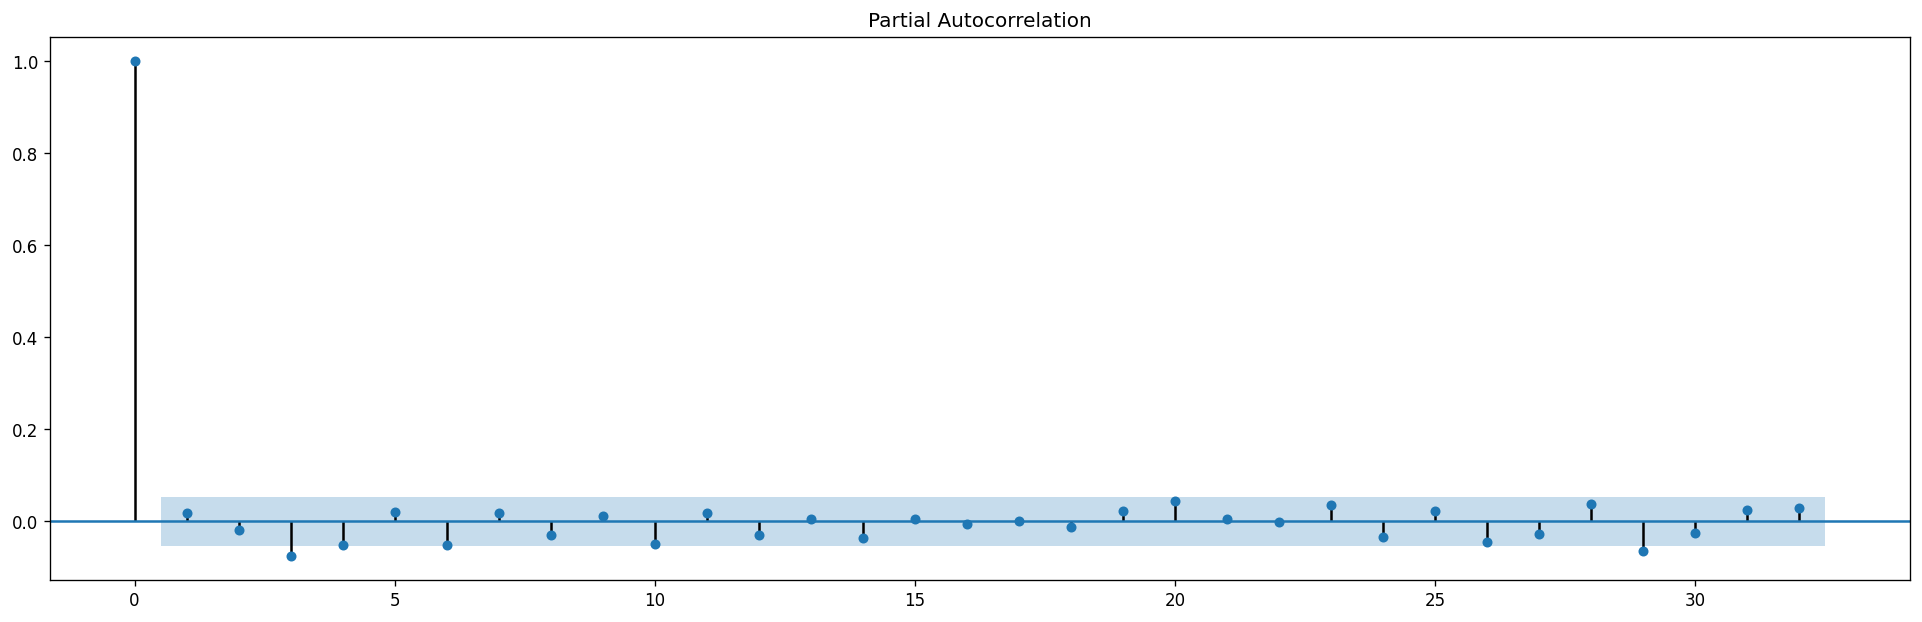

In [ ]:
plot_pacf(stock['FB'].diff().dropna());

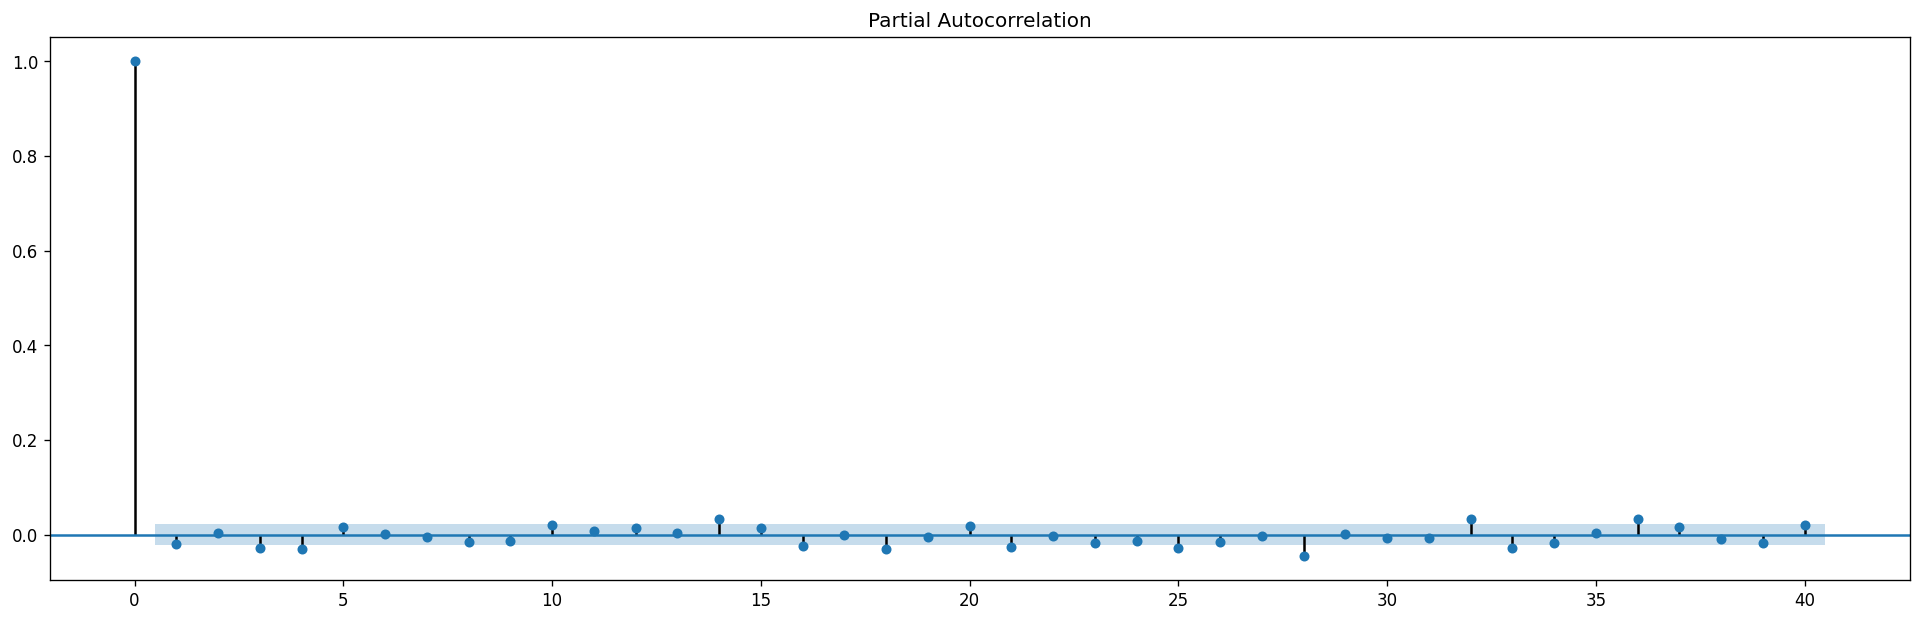

In [ ]:
plot_pacf(stock['MSFT'].diff().dropna());

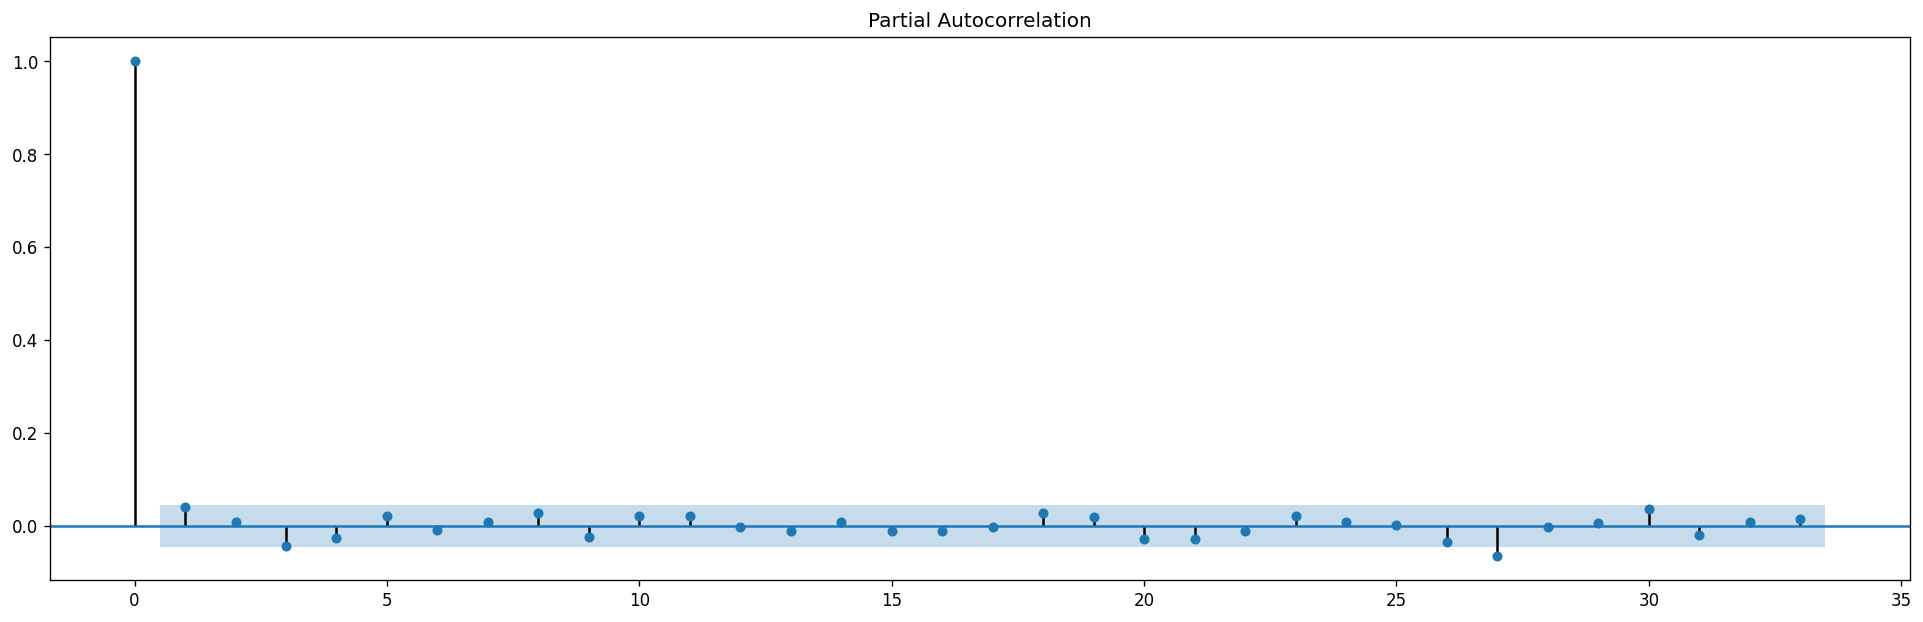

In [ ]:
plot_pacf(stock['TSLA'].diff().dropna());

In [ ]:
def SplitData(data):#80-20
  train=data.iloc[:-int(len(data)*0.2)]
  test=data.iloc[-int(len(data)*0.2):]
  return train,test

In [ ]:
AAPL_train,AAPL_test=SplitData(stock['AAPL'])
TSLA_train,TSLA_test=SplitData(stock['TSLA'])
MSFT_train,MSFT_test=SplitData(stock['MSFT'])
FB_train,FB_test=SplitData(stock['FB'])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#RMSE
def RMSE(model,train_data,test_data):
  start=len(train_data)
  end=len(train_data)+len(test_data)-1
  pred=model.predict(start=start,end=end,typ='levels')
  test_data.mean()
  rmse=sqrt(mean_squared_error(pred,test_data))
  return rmse

In [ ]:
def CreateModel(train_data, test_data):
  train_ar = train_data.values
  test_ar = test_data.values
  history = [x for x in train_ar]
  predictions = list()
  for t in range(len(test_ar)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
  return model_fit, predictions

In [ ]:
def Predictions_Plot(data, train_data, test_data, predictions):
  plt.figure(figsize=(20,10))
  #plt.plot(data, 'green', color='blue', label='Training Data')
  plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
           label='Predicted Price')
  plt.plot(test_data.index, test_data, color='red', label='Actual Price')
  plt.title('Prices Prediction')
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.legend()

In [ ]:
MSFT_Model,MSFT_Model_predictions=CreateModel(MSFT_train, MSFT_test)

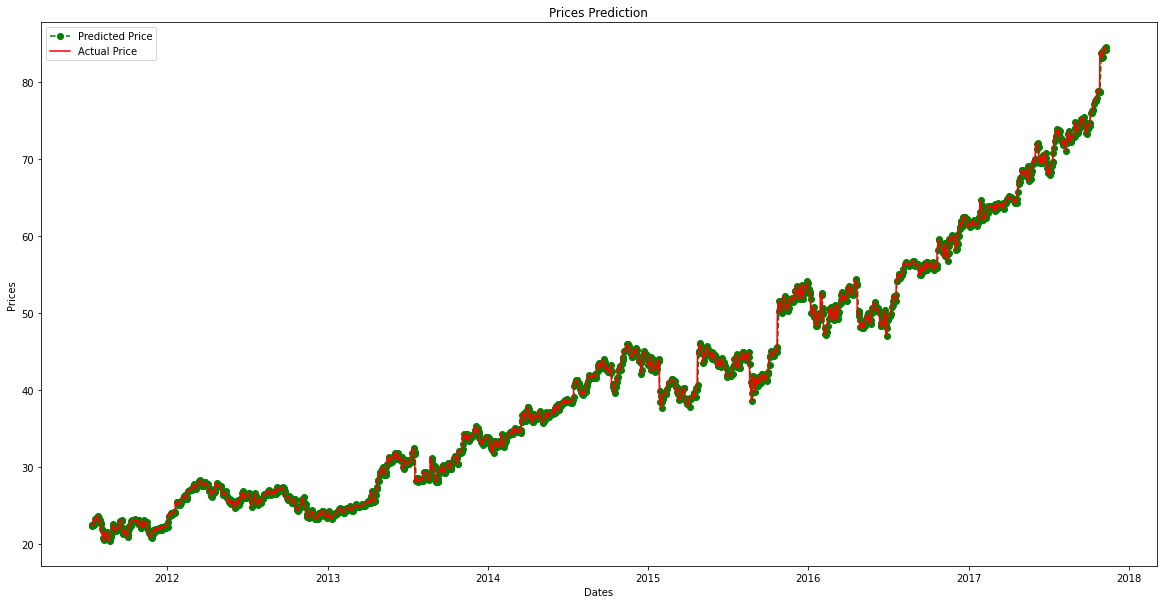

In [ ]:
Predictions_Plot(stock['MSFT'],MSFT_train,MSFT_test,MSFT_Model_predictions)

In [ ]:
AAPL_Model,AAPL_Model_predictions=CreateModel(AAPL_train, AAPL_test)

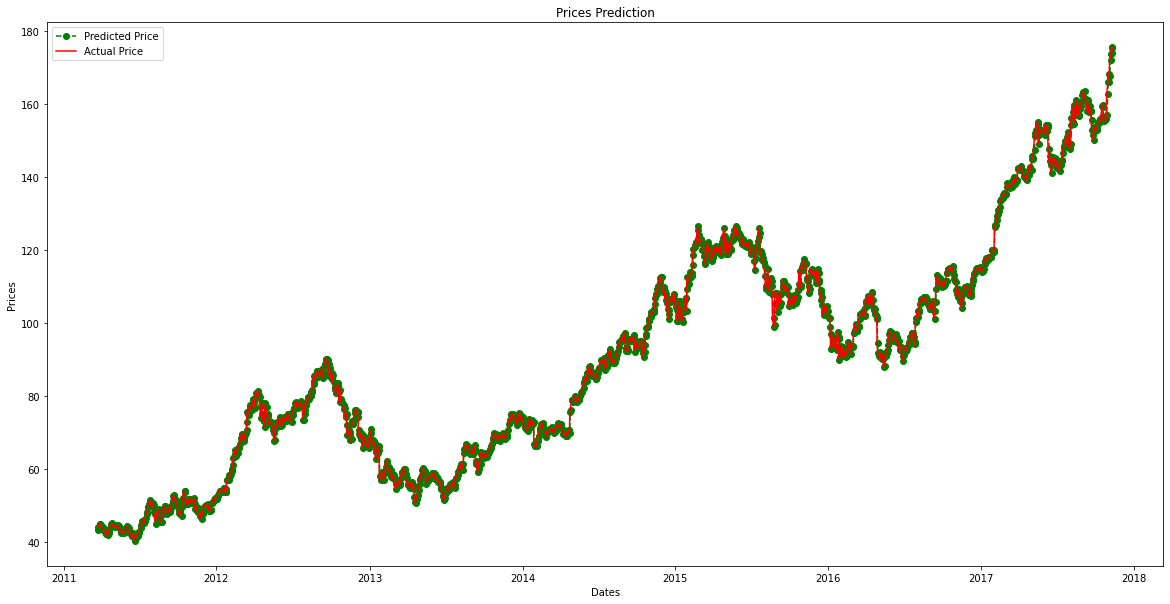

In [ ]:
Predictions_Plot(stock['AAPL'],AAPL_train,AAPL_test,AAPL_Model_predictions)

In [ ]:
FB_Model,FB_Model_predictions=CreateModel(FB_train, FB_test)

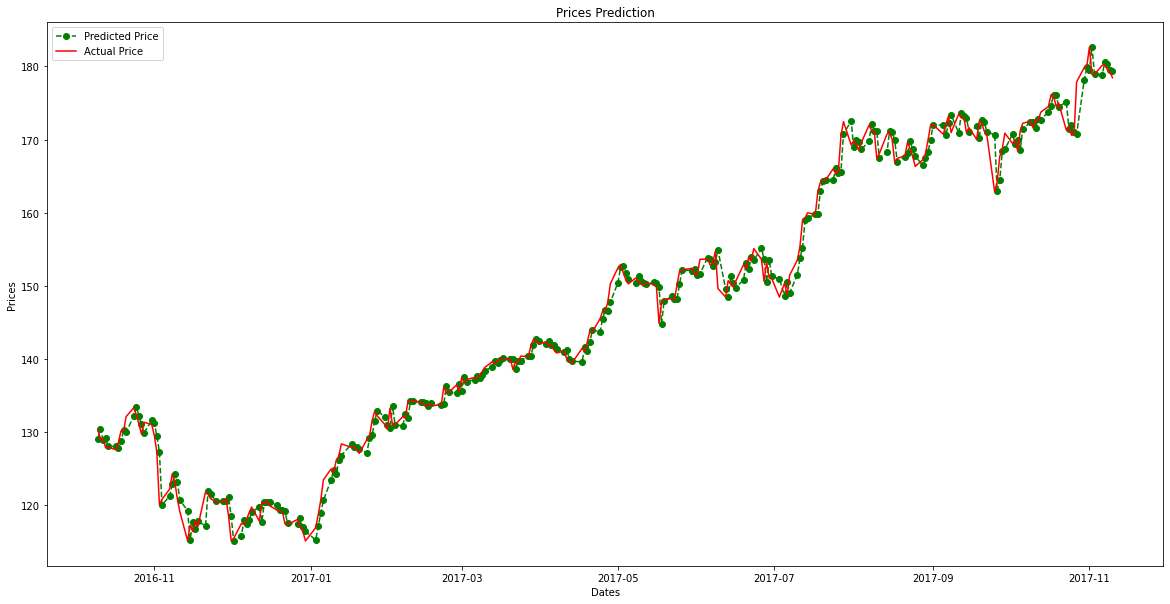

In [ ]:
Predictions_Plot(stock['FB'],FB_train,FB_test,FB_Model_predictions)

In [ ]:
TSLA_Model,TSLA_Model_predictions=CreateModel(TSLA_train, TSLA_test)

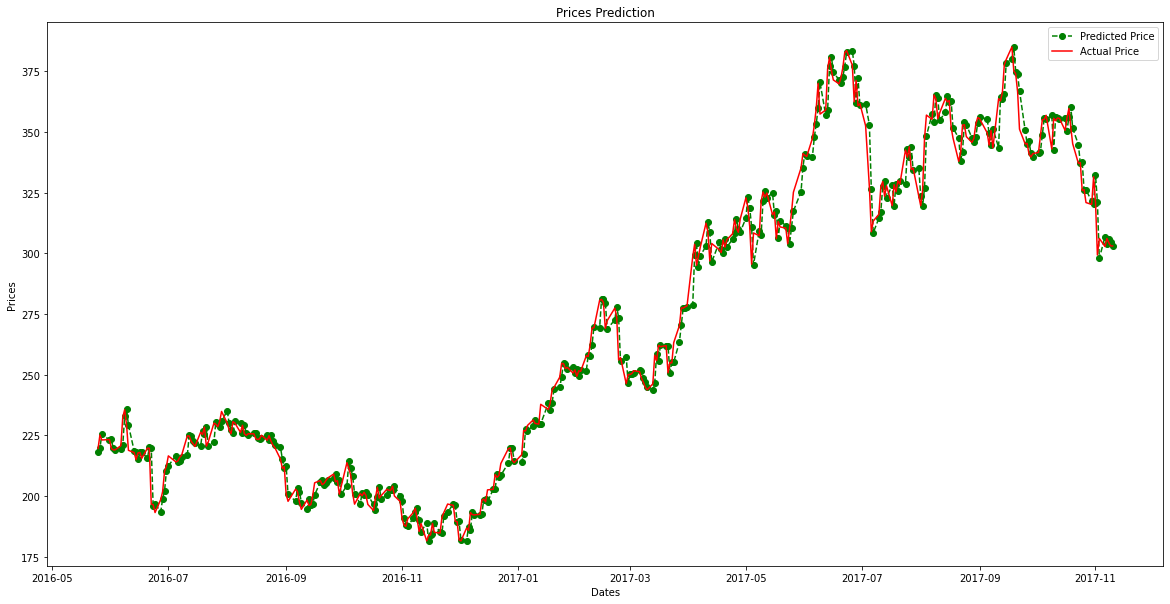

In [ ]:
Predictions_Plot(stock['TSLA'],TSLA_train,TSLA_test,TSLA_Model_predictions)

In [ ]:
AAPL_RMSE=RMSE(AAPL_Model,AAPL_train,AAPL_test)
AAPL_RMSE

1.3947915720443527

In [ ]:
FB_RMSE=RMSE(FB_Model,FB_train,FB_test)
FB_RMSE

1.6845922807626599

In [ ]:
MSFT_RMSE=RMSE(MSFT_Model,MSFT_train,MSFT_test)
MSFT_RMSE

0.5793544838359265

In [ ]:
TSLA_RMSE=RMSE(TSLA_Model,TSLA_train,TSLA_test)
TSLA_RMSE

6.122109313229412